# New Outlet's Profit Prediction

This model predicts Profit of the Restaurant in accordance with population of corresponding city.
So, it can be used to interpret the locations for opening new outlets which will be 

## Importing the Libraries

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math
%matplotlib inline

## Loading the Dataset

In [33]:
x_train, y_train = load_data()

## Get familiar with Dataset


In [45]:
print("Type of x_train:",type(x_train))
print("First five elements of x_train are:\n", x_train[:5],"\n") 
print("Type of y_train:",type(y_train))
print("First five elements of y_train are:\n", y_train[:5],"\n") 
print ('The shape of x_train is:', x_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(x_train))

Type of x_train: <class 'numpy.ndarray'>
First five elements of x_train are:
 [6.1101 5.5277 8.5186 7.0032 5.8598] 

Type of y_train: <class 'numpy.ndarray'>
First five elements of y_train are:
 [17.592   9.1302 13.662  11.854   6.8233] 

The shape of x_train is: (97,)
The shape of y_train is:  (97,)
Number of training examples (m): 97


## Visualize the Data

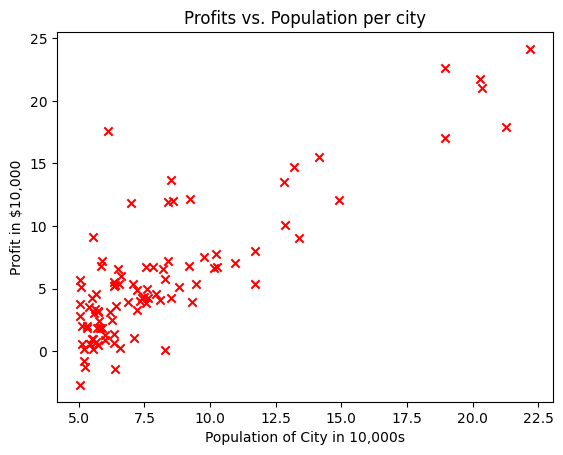

In [48]:
plt.scatter(x_train, y_train, marker='x', c='r') 

plt.title("Profits vs. Population per city")

plt.ylabel('Profit in $10,000')

plt.xlabel('Population of City in 10,000s')
plt.show()

## Computing Cost

In [49]:
def compute_cost(x, y, w, b): 
   
    m = x.shape[0] 
    
    total_cost = 0
 
    for i in range(m):
        f_wb = w*x[i] + b
        total_cost = total_cost + (f_wb-y[i])**2
        
    total_cost = (1/(2*m)) * total_cost

    return total_cost

## Computing Gradient

In [50]:
def compute_gradient(x, y, w, b): 
 
    m = x.shape[0]
    
    dj_dw = 0
    dj_db = 0
    

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = (f_wb - y[i])
        dj_db += dj_db_i
        dj_dw += dj_dw_i   
    dj_dw = dj_dw / m
    dj_db = dj_db / m
        
    return dj_dw, dj_db

In [57]:
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)

print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

Gradient at test w, b: -47.41610118114435 -4.007175051546391


Defining Gradient Descent Algorithm Function

In [55]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
   
    m = len(x)
   
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        dj_dw, dj_db = gradient_function(x, y, w, b )  

        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        if i<100000:     
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history 

## Running Gradient Descent Algorithm to get values of w and b

In [59]:
initial_w = 0.
initial_b = 0.


iterations = 1500
alpha = 0.01

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost     6.74   
Iteration  150: Cost     5.31   
Iteration  300: Cost     4.96   
Iteration  450: Cost     4.76   
Iteration  600: Cost     4.64   
Iteration  750: Cost     4.57   
Iteration  900: Cost     4.53   
Iteration 1050: Cost     4.51   
Iteration 1200: Cost     4.50   
Iteration 1350: Cost     4.49   
w,b found by gradient descent: 1.166362350335582 -3.63029143940436


## Plotting the Linear fit

In [60]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

Text(0.5, 0, 'Population of City in 10,000s')

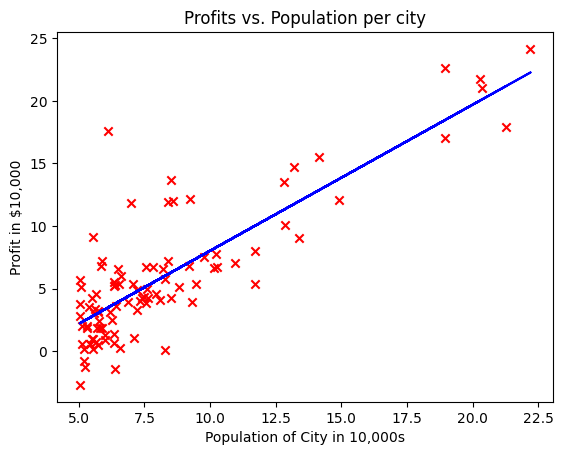

In [61]:
plt.plot(x_train, predicted, c = "b")

plt.scatter(x_train, y_train, marker='x', c='r') 

plt.title("Profits vs. Population per city")

plt.ylabel('Profit in $10,000')

plt.xlabel('Population of City in 10,000s')

## Making Final Predictions

Predicting what the profit would be in areas of 35,000 and 70,000 people.

In [67]:
predict1 = 3.5 * w + b
print('For population = 35,000, we predict a profit of $%.2f' % (predict1*10000))

predict2 = 7.0 * w + b
print('For population = 70,000, we predict a profit of $%.2f' % (predict2*10000))

For population = 35,000, we predict a profit of $4519.77
For population = 70,000, we predict a profit of $45342.45
